# 1. `Problem Definition`
`Task 1`
Iris Flower has three species; Iris setosa,versicolor and virginica, which differs according to their measurement. Now assume you have measurements of the iris flower according to their measurement according to their species, and here your task is to train a machine learning model that can learn from the measurements of the iris species and classify them

In [24]:
#Libraries for EDA and plotting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Scikit learn models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
import xgboost as xgb

# Model Evaluation
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import recall_score,f1_score,precision_score,accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

importing dataset into notebook

In [25]:
data = pd.read_csv("Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# 2. `Exploratory data analysis`

Since we donot need Id column in our dataset we will drop it from our dataset

In [26]:
data.drop("Id",axis=1,inplace=True)

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [28]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Checking for null values

In [29]:
data.columns,data.isna().sum()

(Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
        'Species'],
       dtype='object'),
 SepalLengthCm    0
 SepalWidthCm     0
 PetalLengthCm    0
 PetalWidthCm     0
 Species          0
 dtype: int64)

Seems like there are no empty values and each column has 150 values 

In [30]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


our target column is species we have to classify species using Iris flower measurements lets see its unique species and value counts

In [31]:
data["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [32]:
data["Species"].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

## 2.1 Data Visualization

### Chart 1

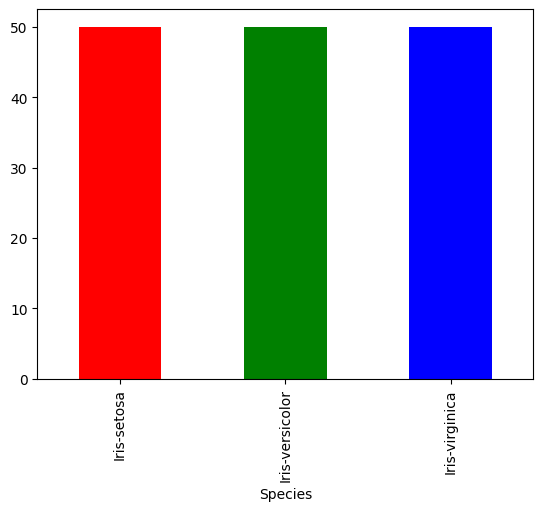

In [33]:
data["Species"].value_counts().plot(kind="bar",color=["Red","Green","Blue"]);

### Chart 2

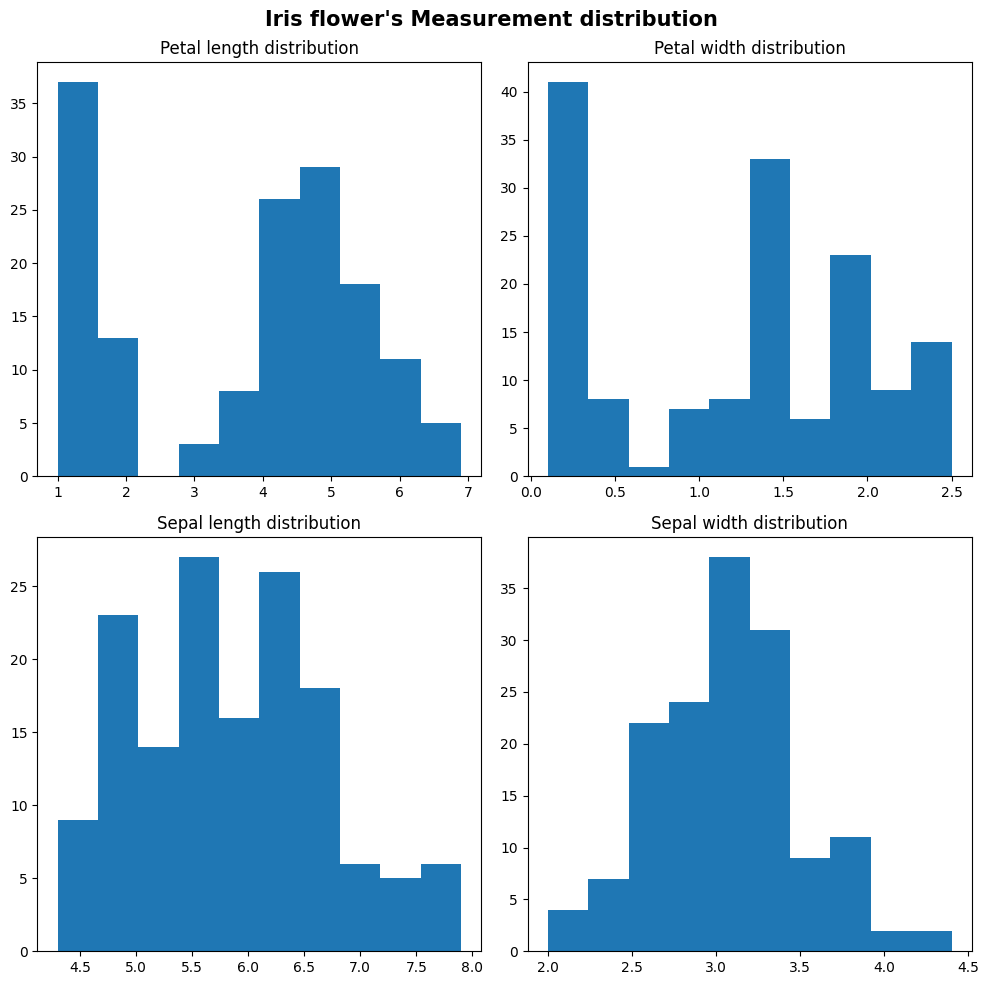

In [34]:
# Lets check the distribution of Iris flower measurements
fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2,
                                        ncols=2,
                                        figsize=(10,10))
ax1.hist(data["PetalLengthCm"])
ax2.hist(data["PetalWidthCm"])
ax3.hist(data["SepalLengthCm"])
ax4.hist(data["SepalWidthCm"])
ax1.set(title="Petal length distribution")
ax2.set(title="Petal width distribution")
ax3.set(title="Sepal length distribution")
ax4.set(title="Sepal width distribution")
fig.suptitle("Iris flower's Measurement distribution ",fontsize = 15,fontweight="bold")
fig.tight_layout()


### Chart 3

In [35]:
color = ["Red","Green","Blue"]
species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

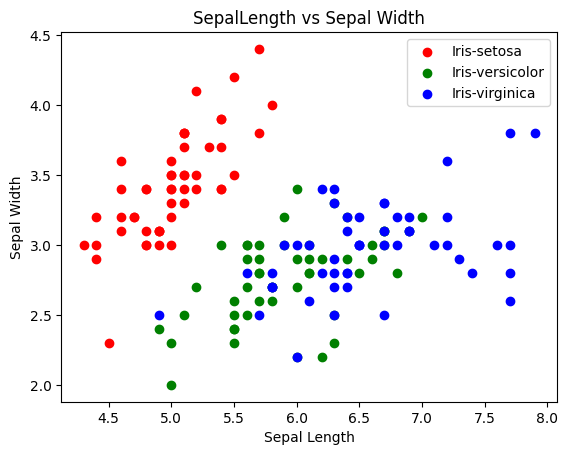

In [36]:
# Sepal length vs Sepal width using scatter plot
for i in range(len(species)):
    # Select data for the current species.
    x = data[data['Species'] == species[i]]

    # Create a scatter plot with the specified color and label for the current species.
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c=color[i], label=species[i])

# Add labels to the x and y axes.
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title("SepalLength vs Sepal Width")

# Add a legend to identify species based on colors.
plt.legend()

# Display the scatter plot.
plt.show()

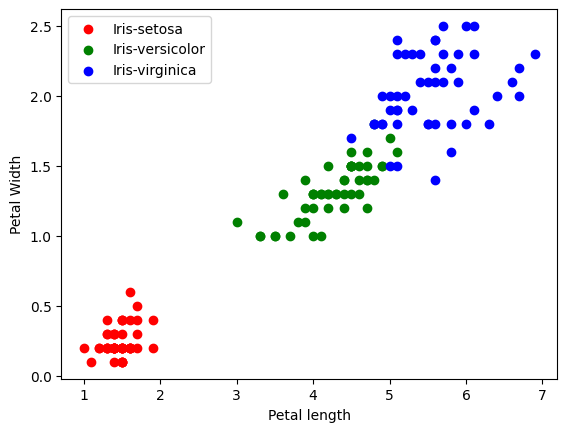

In [37]:
for i in range(len(species)):
    x = data[data["Species"] == species[i]]
    plt.scatter(x["PetalLengthCm"],x["PetalWidthCm"],c=color[i],label=species[i])

plt.xlabel('Petal length')
plt.ylabel('Petal Width')
plt.legend()
plt.show()

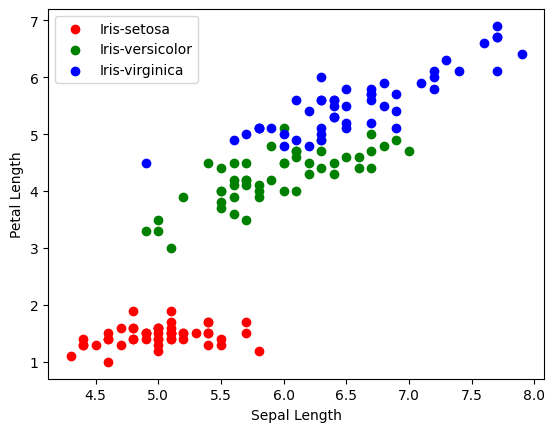

In [38]:
for i in range(len(species)):
    x = data[data["Species"] == species[i]]
    plt.scatter(x["SepalLengthCm"],x["PetalLengthCm"],c=color[i],label=species[i])

plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.legend()
plt.show()

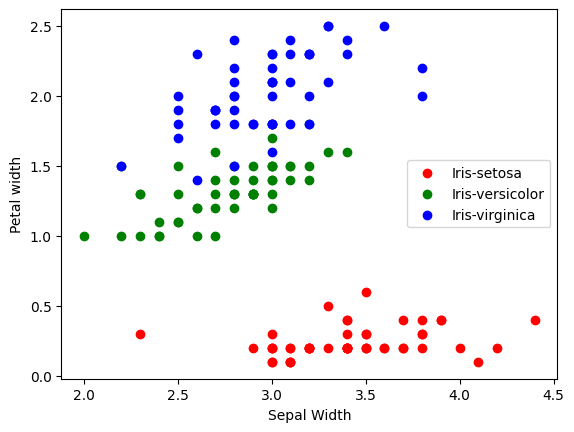

In [39]:
for i in range (len(species)):
    x = data[data["Species"] == species[i]]
    plt.scatter(x["SepalWidthCm"],x["PetalWidthCm"],c=color[i],label=species[i])

plt.xlabel("Sepal Width")
plt.ylabel("Petal width")
plt.legend()
plt.show()

I think that is enough of EDA lets move on towards modelling this dataset

In [40]:
# Before we proceed towards modelling lets convert our species column into numbers becacuse all of models perform on numbers not on strings
from sklearn.preprocessing import LabelEncoder
label_E = LabelEncoder()
data["Species"] = label_E.fit_transform(data["Species"])
data["Species"].unique()

array([0, 1, 2])

We can see our species columns is now into numbers with three unique value compared to before where we had three unique strings
here
1. *0* is Iris-Setosa
2. *1* is Iris-Versicolor
3. *2* is Iris-Virginica

Great! Now that we have our target column (Species) into numbers we can move towards modelling.

# 3. `Modelling`


In [41]:
x = data.drop(columns=["Species"],axis=1)
y = data["Species"]
x.shape,y.shape

((150, 4), (150,))

In [42]:
np.random.seed(42)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

Using scikit learns *Choosing right estimator* in the documentation we see that our dataset is less than 100k and we have numerical data. Considering that we will select these 4 models to see which performs best
https://scikit-learn.org/stable/machine_learning_map.html

In [43]:
def evaluate_model(model, x_train, x_test, y_train, y_test):
    '''The function will take model, x train, x test, y train, y test
    and then it will fit the model, then make predictions on the trained model,
    it will then print roc-auc score of train and test, then plot the roc, auc curve,
    print confusion matrix for train and test, then print classification report for train and test,
    then plot the feature importances if the model has feature importances,
    and finally it will return the following scores as a list:
    recall_train, recall_test, acc_train, acc_test, F1_train, F1_test
    '''

    # Fit the model to the training data.
    model.fit(x_train, y_train)

    # make predictions on the test data
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    # calculate confusion matrix
    cm_train = confusion_matrix(y_train, y_pred_train)
    cm_test = confusion_matrix(y_test, y_pred_test)

    fig, ax = plt.subplots(1, 2, figsize=(11,4))

    print("\nConfusion Matrix:")
    sns.heatmap(cm_train, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[0])
    ax[0].set_xlabel("Predicted Label")
    ax[0].set_ylabel("True Label")
    ax[0].set_title("Train Confusion Matrix")

    sns.heatmap(cm_test, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[1])
    ax[1].set_xlabel("Predicted Label")
    ax[1].set_ylabel("True Label")
    ax[1].set_title("Test Confusion Matrix")

    plt.tight_layout()
    plt.show()


    # calculate classification report
    cr_train = classification_report(y_train, y_pred_train, output_dict=True)
    cr_test = classification_report(y_test, y_pred_test, output_dict=True)
    print("\nTrain Classification Report:")
    crt = pd.DataFrame(cr_train).T
    print(crt.to_markdown())
    # sns.heatmap(pd.DataFrame(cr_train).T.iloc[:, :-1], annot=True, cmap="Blues")
    print("\nTest Classification Report:")
    crt2 = pd.DataFrame(cr_test).T
    print(crt2.to_markdown())
    # sns.heatmap(pd.DataFrame(cr_test).T.iloc[:, :-1], annot=True, cmap="Blues")

    precision_train = cr_train['weighted avg']['precision']
    precision_test = cr_test['weighted avg']['precision']

    recall_train = cr_train['weighted avg']['recall']
    recall_test = cr_test['weighted avg']['recall']

    acc_train = accuracy_score(y_true = y_train, y_pred = y_pred_train)
    acc_test = accuracy_score(y_true = y_test, y_pred = y_pred_test)

    F1_train = cr_train['weighted avg']['f1-score']
    F1_test = cr_test['weighted avg']['f1-score']

    model_score = [precision_train, precision_test, recall_train, recall_test, acc_train, acc_test, F1_train, F1_test ]
    return model_score


Confusion Matrix:


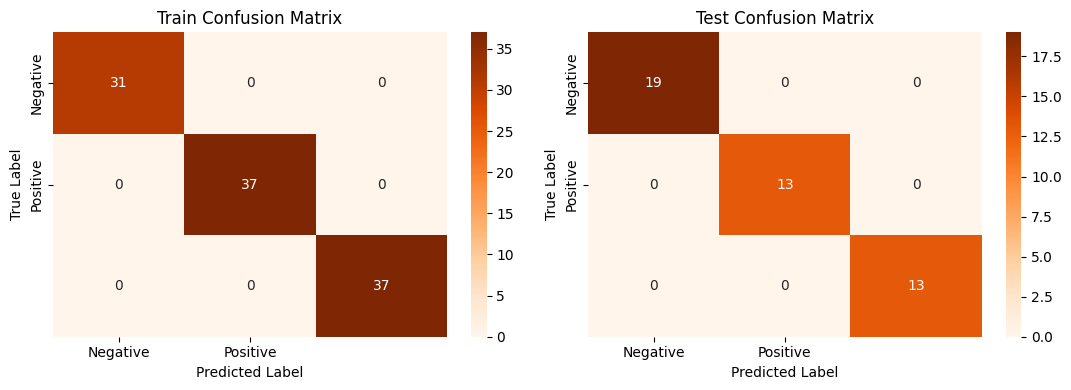


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        31 |
| 1            |           1 |        1 |          1 |        37 |
| 2            |           1 |        1 |          1 |        37 |
| accuracy     |           1 |        1 |          1 |         1 |
| macro avg    |           1 |        1 |          1 |       105 |
| weighted avg |           1 |        1 |          1 |       105 |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        19 |
| 1            |           1 |        1 |          1 |        13 |
| 2            |           1 |        1 |          1 |        13 |
| accuracy     |           1 |        1 |          1 |         1 |
| m

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

In [44]:
evaluate_model(RandomForestClassifier(),x_train,x_test,y_train,y_test)

In [45]:
models = {"clf":RandomForestClassifier(),
          "lr":LogisticRegression(),
          "knn":KNeighborsClassifier(),
          "svc":SVC()}

def fit_and_score(models,x_train,x_test,y_train,y_test):
    np.random.seed(42)
    model_scores = {}
    
    for name,model in models.items():
        model.fit(x_train,y_train)
        model_scores[name] = model.score(x_test,y_test)

    return model_scores

In [46]:
fit_and_score(models,x_train,x_test,y_train,y_test)

{'clf': 1.0, 'lr': 1.0, 'knn': 1.0, 'svc': 1.0}